# 1. What is Correlation?

In this notebook, we demonstrate how and why we need to use regularizaiton in practice, and the different
types of norms we can use to penalize the size of coefficients. We focus mostly on the $L^p$ case in a linear model, but introduce the example of a polynomial fit for clarity.

### Topics:

#### 1.0 Definition of Correlation and Examples
#### 1.1 Examples when correlation provides interesting insights into data. How to plot it?
#### 1.2 Examples when correlation can be used for dimensionality reduction.
#### 1.3 Examples when correlation causes instability.
#### 1.2 How do we get rid of correlation Features? PCA and $L^1$ regularization

In this first lecture, we are going to look at a very simple example where we have a variable $y$ we wish to predict, along with
a single feature $x$. We will then generalize this to higher dimensions.

## How to measure correlation?

$r_{xy}=\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}$


## 1.1 Example of Correlation of Health Insurance Data

Taken from http://www.rand.org/health/projects/hie.html

The RAND Health Insurance Experiment (HIE), the most important health insurance study ever conducted, addressed two key questions in health care financing:

How much more medical care will people use if it is provided free of charge?
What are the consequences for their health?
The HIE project was started in 1971 and funded by the Department of Health, Education, and Welfare (now the Department of Health and Human Services). It was a 15-year, multimillion-dollar effort that to this day remains the largest health policy study in U.S. history. The study's conclusions encouraged the restructuring of private insurance and helped increase the stature of managed care.


We consider the Randhie data set, with the following features.

Number of observations - 20,190
Number of variables - 10
Variable name definitions::

    mdvis   - Number of outpatient visits to an MD
    lncoins - ln(coinsurance + 1), 0 <= coninsurance <= 100
    idp     - 1 if individual deductible plan, 0 otherwise
    lpi     - ln(max(1, annual participation incentive payment))
    fmde    - 0 if idp = 1; ln(max(1, MDE/(0.01 coinsurance))) otherwise
    physlm  - 1 if the person has a physical limitation
    disea   - number of chronic diseases
    hlthg   - 1 if self-rated health is good
    hlthf   - 1 if self-rated health is fair
    hlthp   - 1 if self-rated health is poor
    (Omitted category is excellent self-rated health)

In [7]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

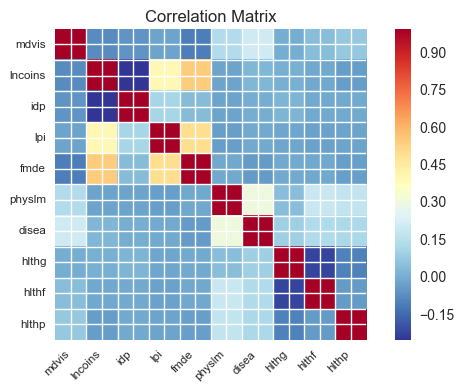

In [5]:
hie_data = sm.datasets.randhie.load_pandas()
corr_matrix = np.corrcoef(hie_data.data.T)
sm.graphics.plot_corr(corr_matrix, xnames=hie_data.names)
plt.show()

In [9]:
df=pd.read_csv('/Users/dgoldma1/Downloads/Adult_final.csv')

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#to convert into numbers

#df_c = le.fit_transform(df)

In [14]:
df.head()

,Unnamed: 0,workclass,education,marital_status,occupation,race,sex,native_region,income,age,hours_per_week,investment_status
0,1,self_emp,bachelors,never_married,office,White,Male,north_america,<=50K,39,40,investor
1,2,self_emp,bachelors,married,office,White,Male,north_america,<=50K,50,13,no_investment
2,3,not_working,hs_grad,not_married,services,White,Male,north_america,<=50K,38,40,no_investment
3,4,not_working,some_hs,married,services,Black,Male,north_america,<=50K,53,40,no_investment
4,5,not_working,bachelors,married,office,Black,Female,south_america,<=50K,28,40,no_investment


In [15]:
df = df.drop(['Unnamed: 0'],1)

In [16]:
d

In [17]:
df.head()

,workclass,education,marital_status,occupation,race,sex,native_region,income,age,hours_per_week,investment_status
0,3,1,1,2,4,1,2,0,39,40,0
1,3,1,0,2,4,1,2,0,50,13,1
2,1,3,2,4,4,1,2,0,38,40,1
3,1,5,0,4,2,1,2,0,53,40,1
4,1,1,0,2,2,0,3,0,28,40,1


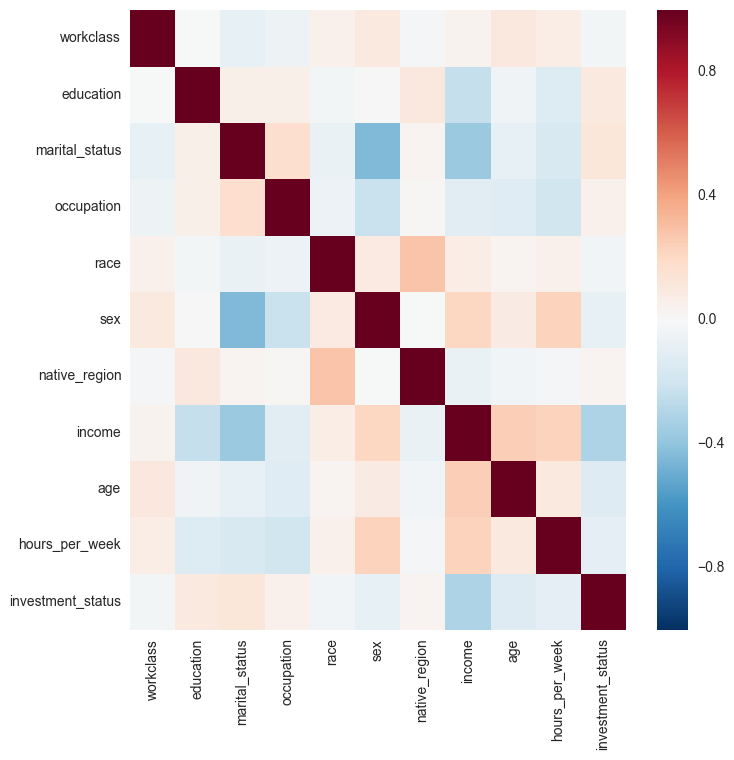

In [18]:
import seaborn as sns
plt.figure(figsize=(8,8))
corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# What did we do wrong here?

We measured correlation correctly, but what about the categorical variables? Does our definition make sense? Hint: The answer is no.

In [53]:
df=df.drop(['Unnamed: 0'],1)

In [56]:
corr.columns.values

array(['age', 'hours_per_week'], dtype=object)

# Principle Component Analysis

We choose the example of digit recognition

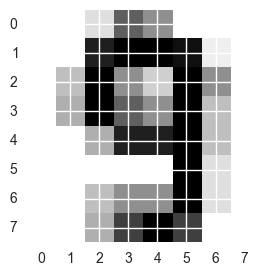

In [22]:
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [6]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_) 

[ 0.99244289  0.00755711]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

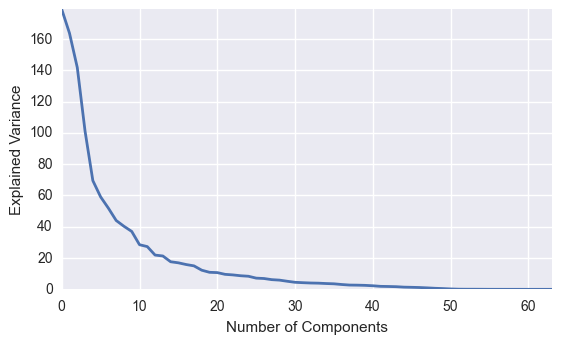

In [27]:
pca.fit(X_digits)

plt.figure(1, figsize=(7, 4))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

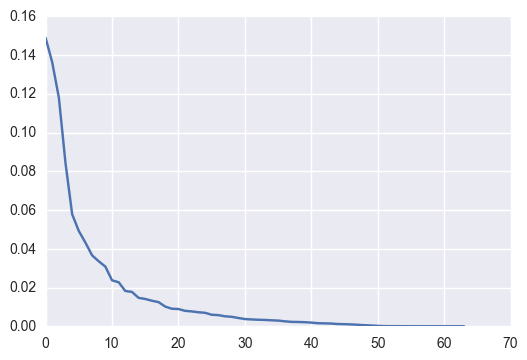

In [5]:
import numpy as np
from numpy import linalg as LA
from scipy.linalg import eig
from sklearn import datasets
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import statsmodels.api as sm
%matplotlib inline
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
X_std = digits.data
mean_vec = np.mean(digits.data, axis=0)
cov_mat = (X_std - mean_vec)/len(X_std)

eig_vals, eig_vecs = LA.eig((cov_mat.T).dot(cov_mat))

plt.plot((np.sort(eig_vals)/np.sum(eig_vals))[::-1])

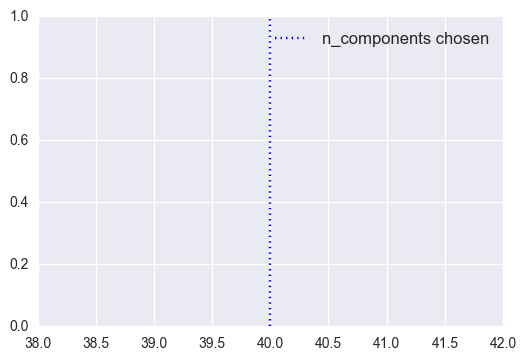

In [17]:
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

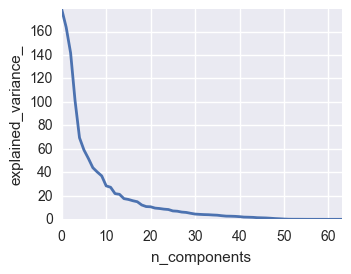

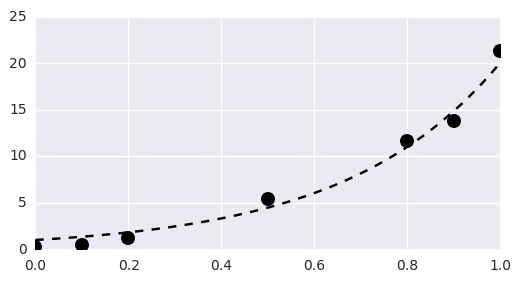

In [10]:
f = lambda x: np.exp(3 * x)

x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

In [11]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

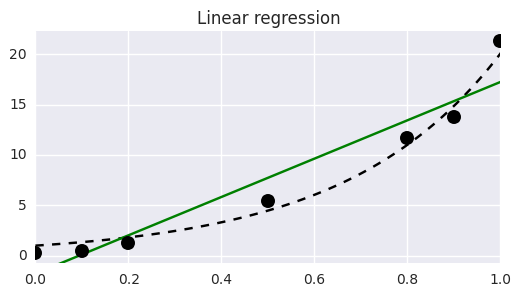

In [12]:
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

22.20 -3.15 0.00
363.96 -813.58 616.42 -163.10 17.40 0.00


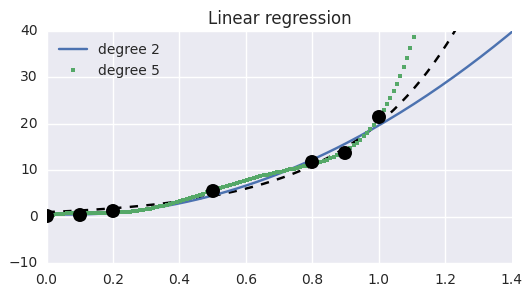

In [13]:
lrp = lm.LinearRegression()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_lrp, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Linear regression");

11.78 6.61 0.00
4.00 3.68 3.60 3.95 4.64 0.00


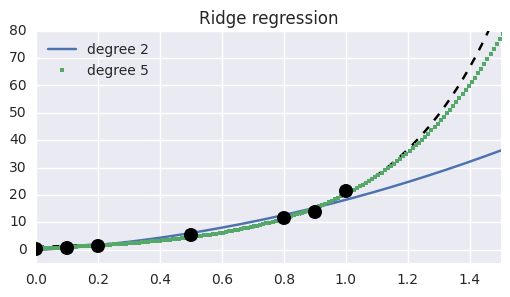

In [14]:
ridge = lm.RidgeCV()
plt.figure(figsize=(6,3));
plt.plot(x_tr, y_tr, '--k');

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y);
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_ridge, s, label='degree ' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.5);
    plt.ylim(-5, 80);
    # Print the model's coefficients.
    print(' '.join(['%.2f' % c for c in ridge.coef_]))

plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge regression");

In [8]:
# http://ipython-books.github.io/featured-04/


# 1.2 Example of over-fitting with realistic data - Hotel Booking example.




In [85]:
# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
size=10

purchase_velocity_lastweek = nprnd.randint(0,500,size=size)

hotel_rating = nprnd.randint(1,100,size=size).astype(float)/10

price_per_night_avg = nprnd.randint(100,600,size=size)

sellouts_total = nprnd.randint(1,10,size=size)

location = nprnd.randint(1,100,size=size).astype(float)/10

rooms_left = nprnd.randint(1,500,size=size)

account_num = nprnd.randint(1,100000,size=size)
date='2015-06-01'

df = pd.DataFrame({'hotel_rating':hotel_rating, 'location':location, 'price_per_night_avg':price_per_night_avg,'purchase_velocity_lastweek':purchase_velocity_lastweek,'rooms_left':rooms_left})
rooms_sold = (0.9*purchase_velocity_lastweek + 0.8*hotel_rating + 0.7*sellouts_total + 0.6*price_per_night_avg + 0.4*location)/10
rooms_sold = 0.8*hotel_rating
noise = np.random.normal(0,0.5,size)

rooms_sold=rooms_sold+noise

In [52]:
df = pd.DataFrame({'account': account_num, 'purchase_velocity_lastweek':purchase_velocity_lastweek, 'hotel_rating':hotel_rating,
                   'price_per_night_avg':price_per_night_avg,'sellouts_total':sellouts_total,'location':location,'rooms_left':rooms_left,'const':1})

In [53]:
df.head()

,account,const,hotel_rating,location,price_per_night_avg,purchase_velocity_lastweek,rooms_left,sellouts_total
0,72722,1,1.6,9.5,584,60,198,2
1,20627,1,8.2,9.2,503,326,439,8
2,55924,1,8.0,0.9,467,327,240,8
3,14773,1,9.5,9.9,543,102,286,4
4,60469,1,1.8,5.7,144,42,335,2


Now we will make a simple scatter plot of the data, and try to use the variables above to make the prediction. 
If we didn't know the formula above, we may be tempted to just throw all the variabels into the linear regression
and see what happens!

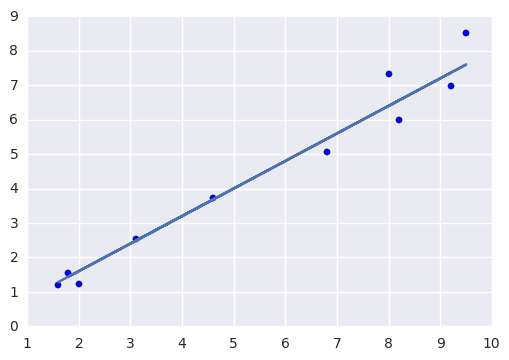

In [73]:
plt.plot(hotel_rating,0.8*hotel_rating)
plt.scatter(hotel_rating,rooms_sold)

In [ ]:
X = df
y = rooms_sold

# Attempt 1 - Why not put all of the variables into the model?

In [74]:

# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ -5.84955513e-05,  -4.38017678e-15,   5.80834543e-01,
        -5.17109422e-01,   6.76506626e-03,  -7.80654777e-03,
         2.71142492e-03,  -4.50500961e-02]))
Residual sum of squares: 10.36
Variance score: -10.45


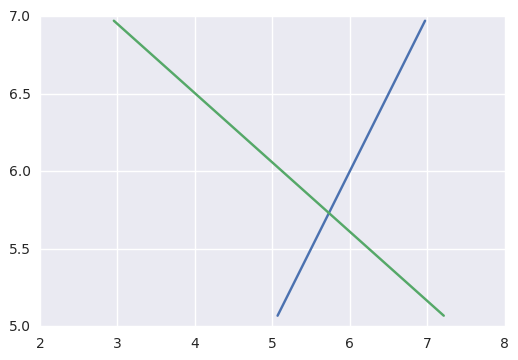

In [75]:
plt.plot(y_test,y_test)
plt.plot(regr.predict(X_test),y_test)

So what went wrong here? What went wrong is that when we introduce extra variables, we increase the **degrees of freedom that our model is allowed to learn on:**

\begin{array}{lcl} \alpha x_{11} + \beta x_{12} + \gamma x_{13}  & = & y_2 \\ \alpha x_{21} + \beta x_{22} + \gamma x_{23}  & = & y_2 \\ \alpha x_{31} + \beta x_{32} + \gamma x_{33}  & = & y_3\end{array}


As long as $y$ belongs to the column space of $X$, there will exist a solution. Even when we have many more equations
than variables, we can always restrict the dimension of the matrix so that we pick up unwanted variance. 



# Attempt 2 - Just one variable

In [80]:
X = df[['hotel_rating','const']]
y = rooms_sold

In [81]:
# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.88406051,  0.        ]))
Residual sum of squares: 0.60
Variance score: 0.33


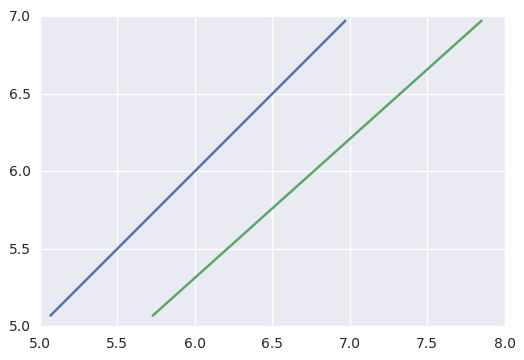

In [69]:
plt.plot(y_test,y_test)
plt.plot(regr.predict(X_test),y_test)

Doesn't this look much better? But going thorugh variables one by one is not practical when you have hundreds, or 
even thousands of variables. How do we have a more sysmetatic approach?

# $L^p$ Regularization - A more general approach

![alt text](../img/regularization.png "Title")

## $L^2$ - Ridge Regression

In [89]:
X = df
y = rooms_sold
# Split the data into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = Ridge(alpha=10000)

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.00147888, -0.00096685,  0.00066465, -0.0073036 , -0.00967956]))
Residual sum of squares: 39.22
Variance score: -10.91


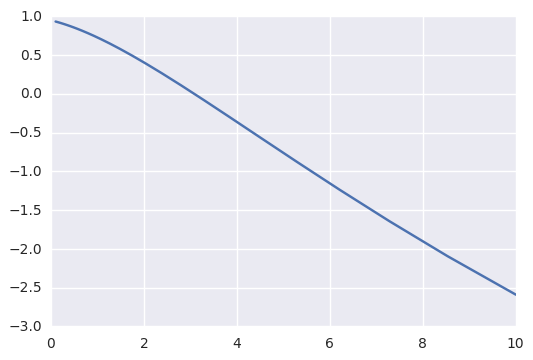

In [92]:
# Create linear regression object
alphas = np.logspace(-1,1,30)

scores = []

for alpha in alphas:
    regr = Ridge(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)
  

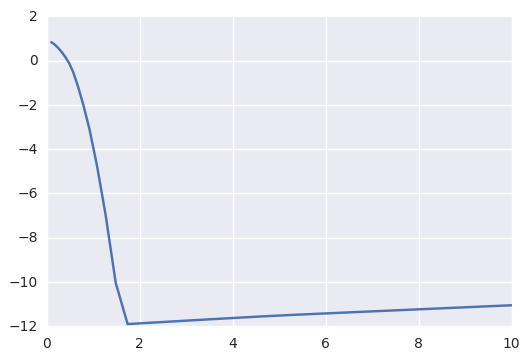

In [96]:
# Create linear regression object
alphas = np.logspace(-1,1,30)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.plot(alphas,scores)


**Exercise:** Notice how the performance drops off much quicker for Lasso ($L^1$). Why is that the case?

**Answer:** $L^1$ tends to send all of the coefficients to zero because of the way the level sets are formed as you
may recall. $L^2$, being a smooth norm, spreads out the effect onto the coefficients more evenly as the parameter is restricted. 

Not surprisingly, the larger we allow the bound on the coeffciients to be, the worse the performance. 